<a href="https://colab.research.google.com/github/saptarshidatta96/MTech_Sem3/blob/main/CV_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imshow, imread
from sklearn.cluster import MiniBatchKMeans
import numpy as np
import argparse
import cv2
from google.colab.patches import cv2_imshow
import math
import sys, time

In [ ]:
barbara = imread('/content/barbara.jpg')
print(barbara)

[[ 87  92  97 ... 107 115 116]
 [109 112 121 ... 123 128 130]
 [162 161 172 ... 136 134 142]
 ...
 [ 82  88  89 ... 111 112 104]
 [ 84  85  84 ... 112 114 106]
 [ 83  80  83 ... 111 112 104]]


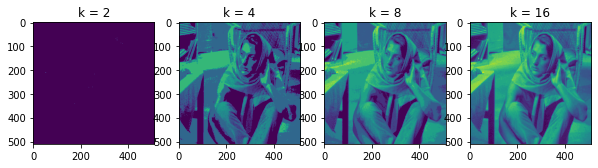

In [ ]:
k = 2**np.arange(1, 5)
figure, axis = plt.subplots(1, len(k), figsize=(10, 6))
for k, ax in zip(k, axis):
    bins = np.linspace(0, barbara.max(), k)
    image = (np.vectorize(bins.tolist().__getitem__)(np.digitize(barbara, bins)-1))
    ax.imshow(image)
    ax.set_title('k = {}'.format(k))

k = 2


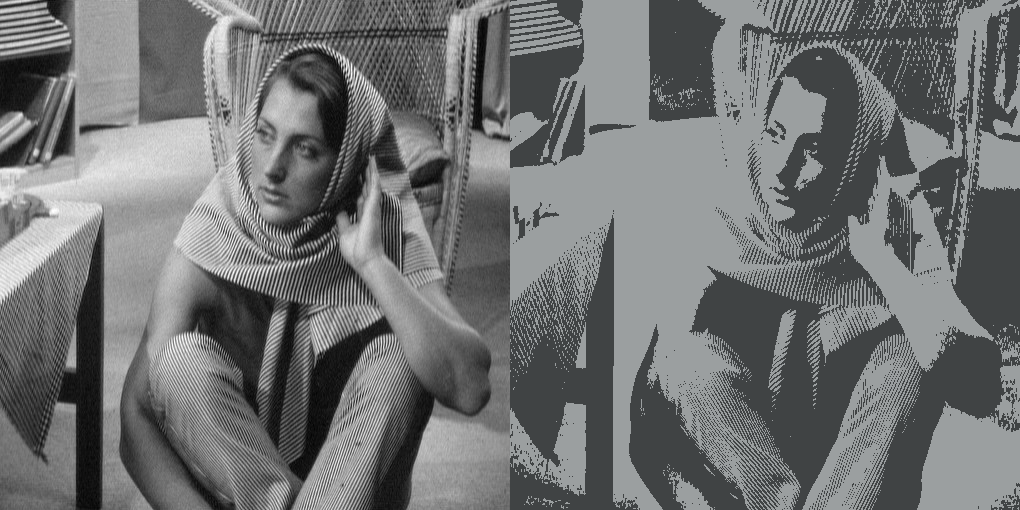

k = 8


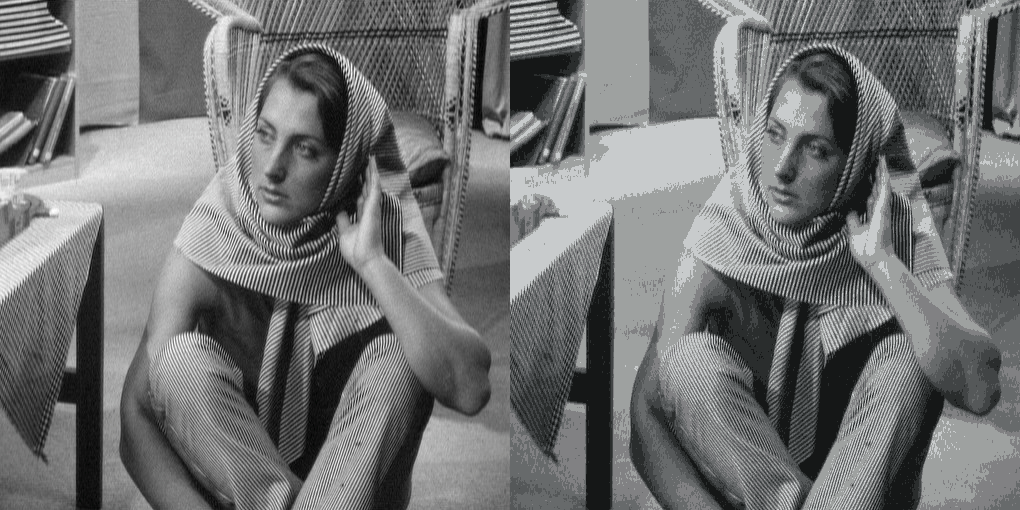

k = 16


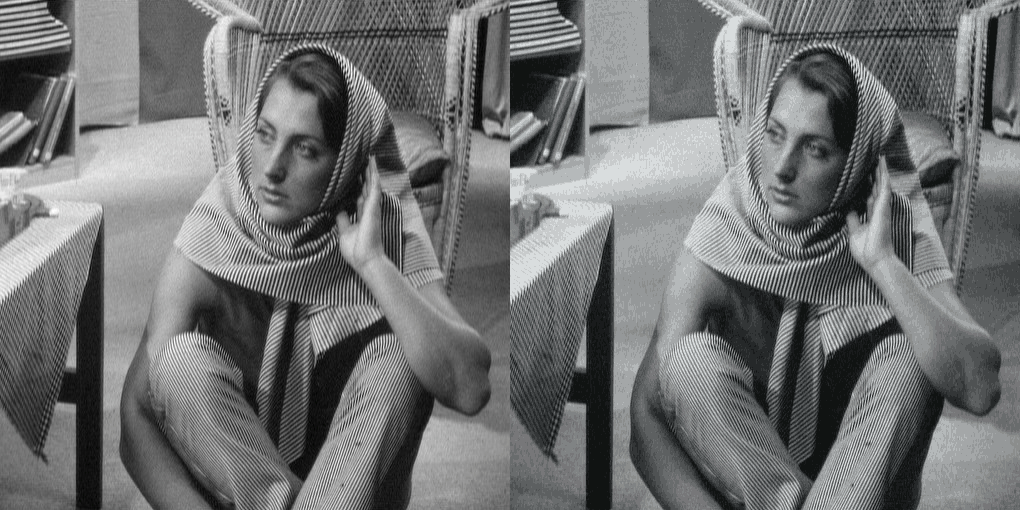

k = 32


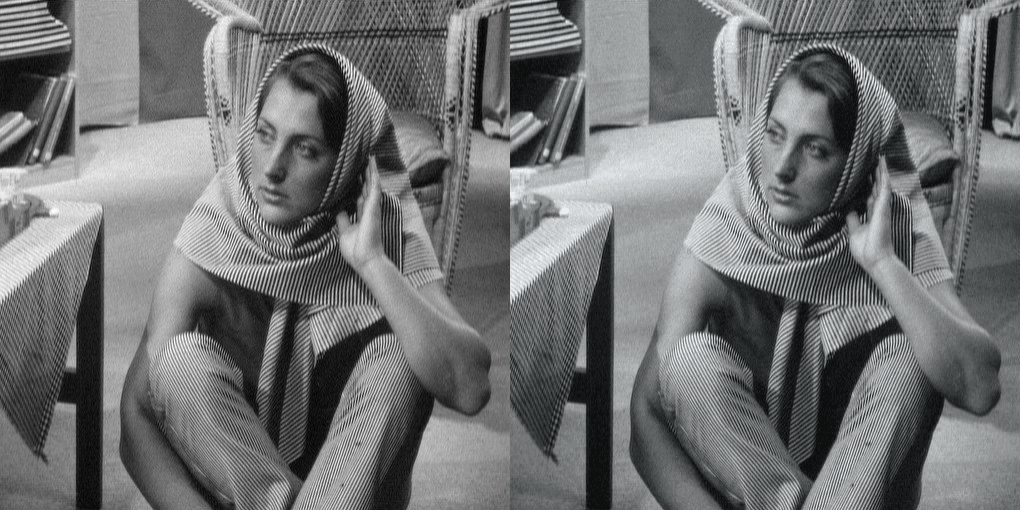

k = 40


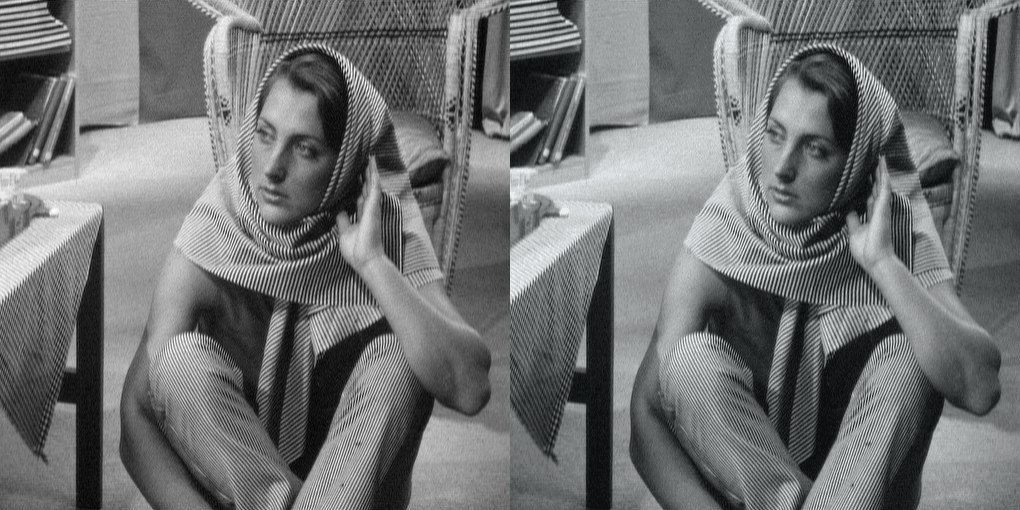

In [ ]:
image = cv2.imread('/content/barbara.jpg')
(h, w) = image.shape[:2]
k = [2,8,16,32,40]
for k in k:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    image = image.reshape((image.shape[0] * image.shape[1], 3))
    clt = MiniBatchKMeans(n_clusters = k)
    labels = clt.fit_predict(image)
    quant = clt.cluster_centers_.astype("uint8")[labels]
    quant = quant.reshape((h, w, 3))
    image = image.reshape((h, w, 3))
    quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
    image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)
    print('k = {}'.format(k))
    cv2_imshow(np.hstack([image, quant]))

In [ ]:
def u(s, a):
  if (abs(s) >= 0) & (abs(s) <= 1):
    return (a+2)*(abs(s)**3)-(a+3)*(abs(s)**2)+1
  elif (abs(s) > 1) & (abs(s) <= 2):
    return a*(abs(s)**3)-(5*a)*(abs(s)**2)+(8*a)*abs(s)-4*a
  else:
    return 0

In [ ]:
H, W, C = image.shape
padded_img = np.zeros((H+4, W+4, C))

padded_img[2:H+2, 2:W+2, :C] = image
      
# Pad the first/last two col and row
padded_img[2:H+2, 0:2, :C] = image[:, 0:1, :C]
padded_img[H+2:H+4, 2:W+2, :] = image[H-1:H, :, :]
padded_img[2:H+2, W+2:W+4, :] = image[:, W-1:W, :]
padded_img[0:2, 2:W+2, :C] = image[0:1, :, :C]

      
# Pad the missing eight points
padded_img[0:2, 0:2, :C] = image[0, 0, :C]
padded_img[H+2:H+4, 0:2, :C] = image[H-1, 0, :C]
padded_img[H+2:H+4, W+2:W+4, :C] = image[H-1, W-1, :C]
padded_img[0:2, W+2:W+4, :C] = image[0, W-1, :C]



In [ ]:
dH = math.floor(H*2)
dW = math.floor(W*2)
# Converting into matrix
dst = np.zeros((dH, dW, 3))
h = 0.5

In [ ]:
for c in range(C):
        for j in range(dH):
            for i in range(dW):
                
                # Getting the coordinates of the
                # nearby values
                x, y = i * h + 2, j * h + 2
  
                x1 = 1 + x - math.floor(x)
                x2 = x - math.floor(x)
                x3 = math.floor(x) + 1 - x
                x4 = math.floor(x) + 2 - x
  
                y1 = 1 + y - math.floor(y)
                y2 = y - math.floor(y)
                y3 = math.floor(y) + 1 - y
                y4 = math.floor(y) + 2 - y
                  
                # Considering all nearby 16 values
                mat_l = np.matrix([[u(x1, -0.5), u(x2, -0.5), u(x3, -0.5), u(x4, -0.5)]])
                mat_m = np.matrix([[padded_img[int(y-y1), int(x-x1), c],
                                    padded_img[int(y-y2), int(x-x1), c],
                                    padded_img[int(y+y3), int(x-x1), c],
                                    padded_img[int(y+y4), int(x-x1), c]],
                                   [padded_img[int(y-y1), int(x-x2), c],
                                    padded_img[int(y-y2), int(x-x2), c],
                                    padded_img[int(y+y3), int(x-x2), c],
                                    padded_img[int(y+y4), int(x-x2), c]],
                                   [padded_img[int(y-y1), int(x+x3), c],
                                    padded_img[int(y-y2), int(x+x3), c],
                                    padded_img[int(y+y3), int(x+x3), c],
                                    padded_img[int(y+y4), int(x+x3), c]],
                                   [padded_img[int(y-y1), int(x+x4), c],
                                    padded_img[int(y-y2), int(x+x4), c],
                                    padded_img[int(y+y3), int(x+x4), c],
                                    padded_img[int(y+y4), int(x+x4), c]]])
                mat_r = np.matrix(
                    [[u(y1, -0.5)], [u(y2, -0.5)], [u(y3, -0.5)], [u(y4, -0.5)]])
                  
                # Here the dot function is used to get 
                # the dot product of 2 matrices
                dst[j, i, c] = np.dot(np.dot(mat_l, mat_m), mat_r)
  
   

In [ ]:
cv2.imwrite('bicubic.png', dst) 
bicubicImg=cv2.imread('bicubic.png')

In [ ]:
print('Original Image Shape:',padded_img.shape)
print('Generated Bicubic Image Shape:',bicubicImg.shape)

Original Image Shape: (514, 514, 3)
Generated Bicubic Image Shape: (1020, 1020, 3)


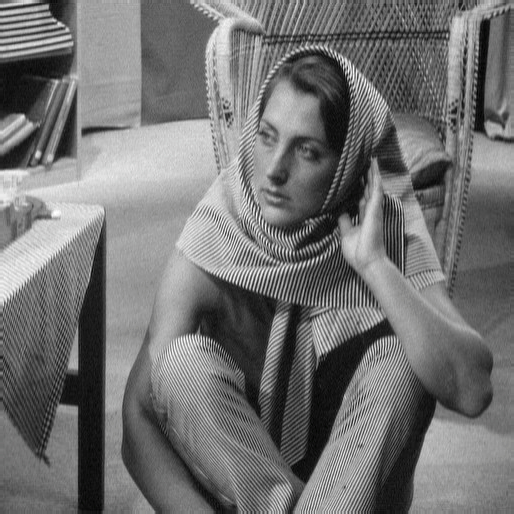

In [ ]:
cv2_imshow(padded_img)

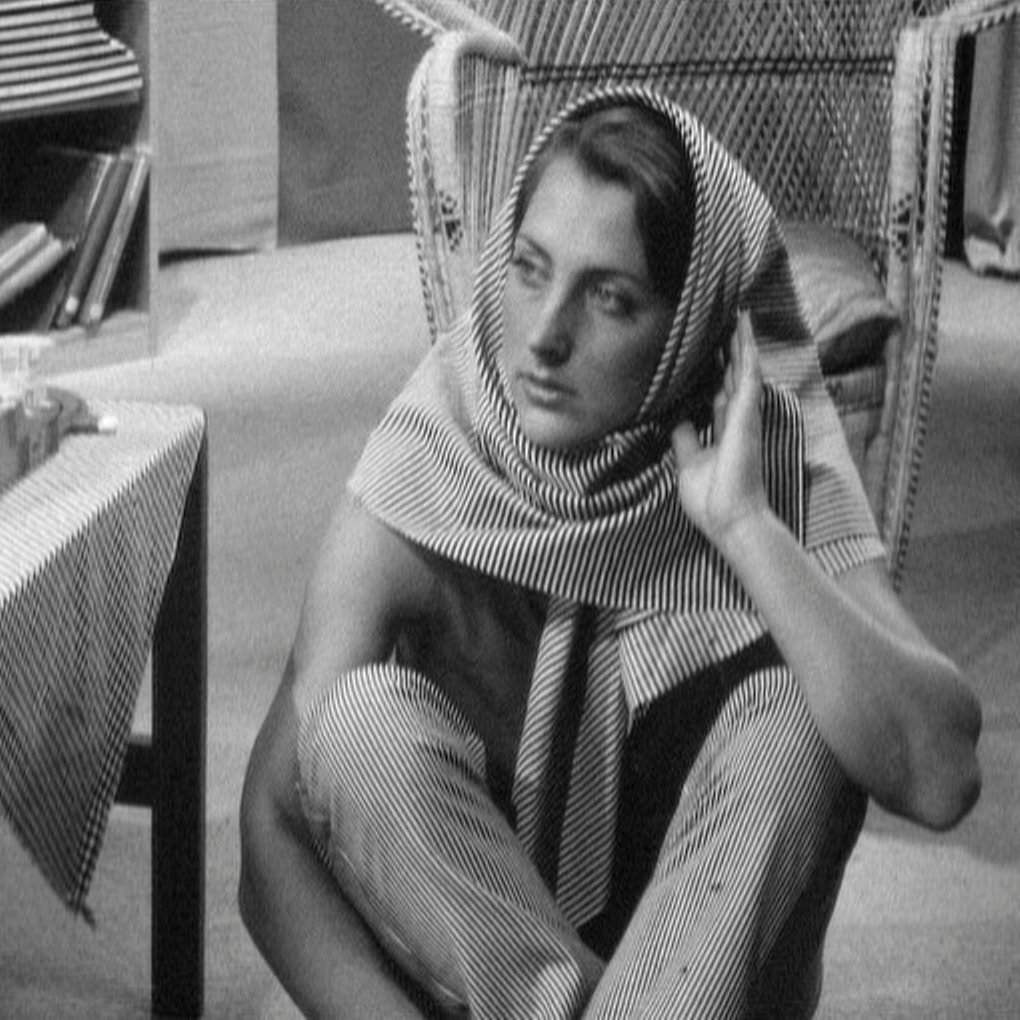

In [ ]:
cv2_imshow(bicubicImg)

In [ ]:
import imutils
def pyramid(image, scale=1.5, minSize=(30, 30)):
	# yield the original image
	yield image
	# keep looping over the pyramid
	while True:
		# compute the new dimensions of the image and resize it
		w = int(image.shape[1] / scale)
		image = imutils.resize(image, width=w)
		# if the resized image does not meet the supplied minimum
		# size, then stop constructing the pyramid
		if image.shape[0] < minSize[1] or image.shape[1] < minSize[0]:
			break
		# yield the next image in the pyramid
		yield image

In [ ]:
image = pyramid(image, scale=1.5, minSize=(30, 30))

In [ ]:
image

<generator object pyramid at 0x7fb41e0caad0>

In [42]:
def convolve2d(image, kernel):
    kernel = np.flipud(np.fliplr(kernel))
    output = np.zeros_like(image)

    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
    image_padded[1:-1, 1:-1] = image

    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y, x] = (kernel * image_padded[y: y+3, x: x+3]).sum()

    return output

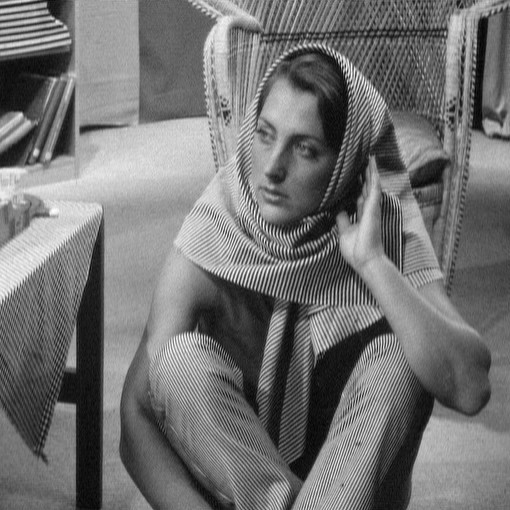

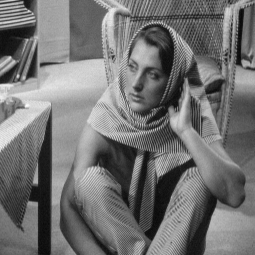

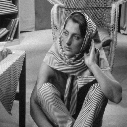

In [41]:
img = cv2.imread("/content/barbara.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
layer = img.copy() 
kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])/16.0
rows, cols= map(int, layer.shape)

for i in range(3):
    # using pyrDown() function
    layer = convolve2d(img, kernel)
    layer = cv2.resize(img, (rows, cols))
    rows = rows //2
    cols = cols // 2
    cv2_imshow(layer)

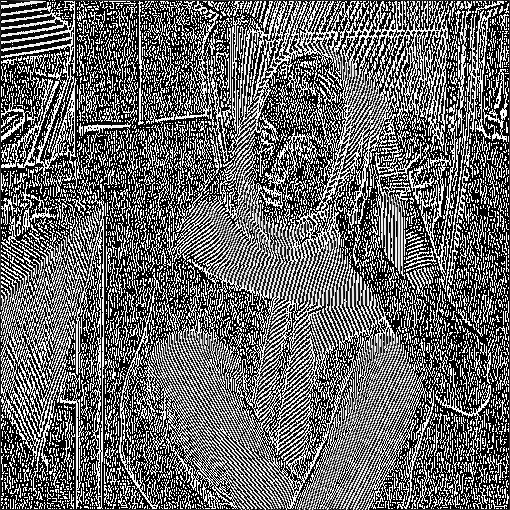

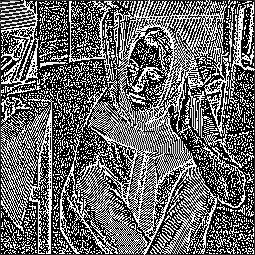

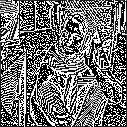

In [56]:
img = cv2.imread("/content/barbara.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
layer = img.copy() 
kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])/16.0
rows, cols= map(int, layer.shape)

for i in range(3):
    layer = convolve2d(layer, kernel)
    layer = cv2.resize(img, (rows, cols))
    for i in range(1):
        down = convolve2d(layer, kernel)
        up = cv2.resize(down, (rows, cols))
        cv2_imshow(layer-up)
    rows = rows //2
    cols = cols//2


In [ ]:
def laplacian():
  img = cv2.imread("/content/barbara.jpg") 
  layer = img.copy()
  for i in range(3):
    layer = cv2.pyrDown(layer)
    for i in range(1):
      down = cv2.pyrDown(layer)
      up = cv2.pyrUp(down)
      up = cv2.resize(up, (layer.shape[1], layer.shape[0]))
      cv2_imshow(layer-up)


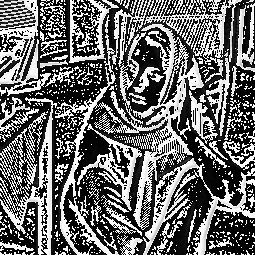

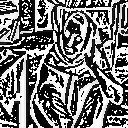

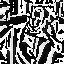

In [ ]:
laplacian()

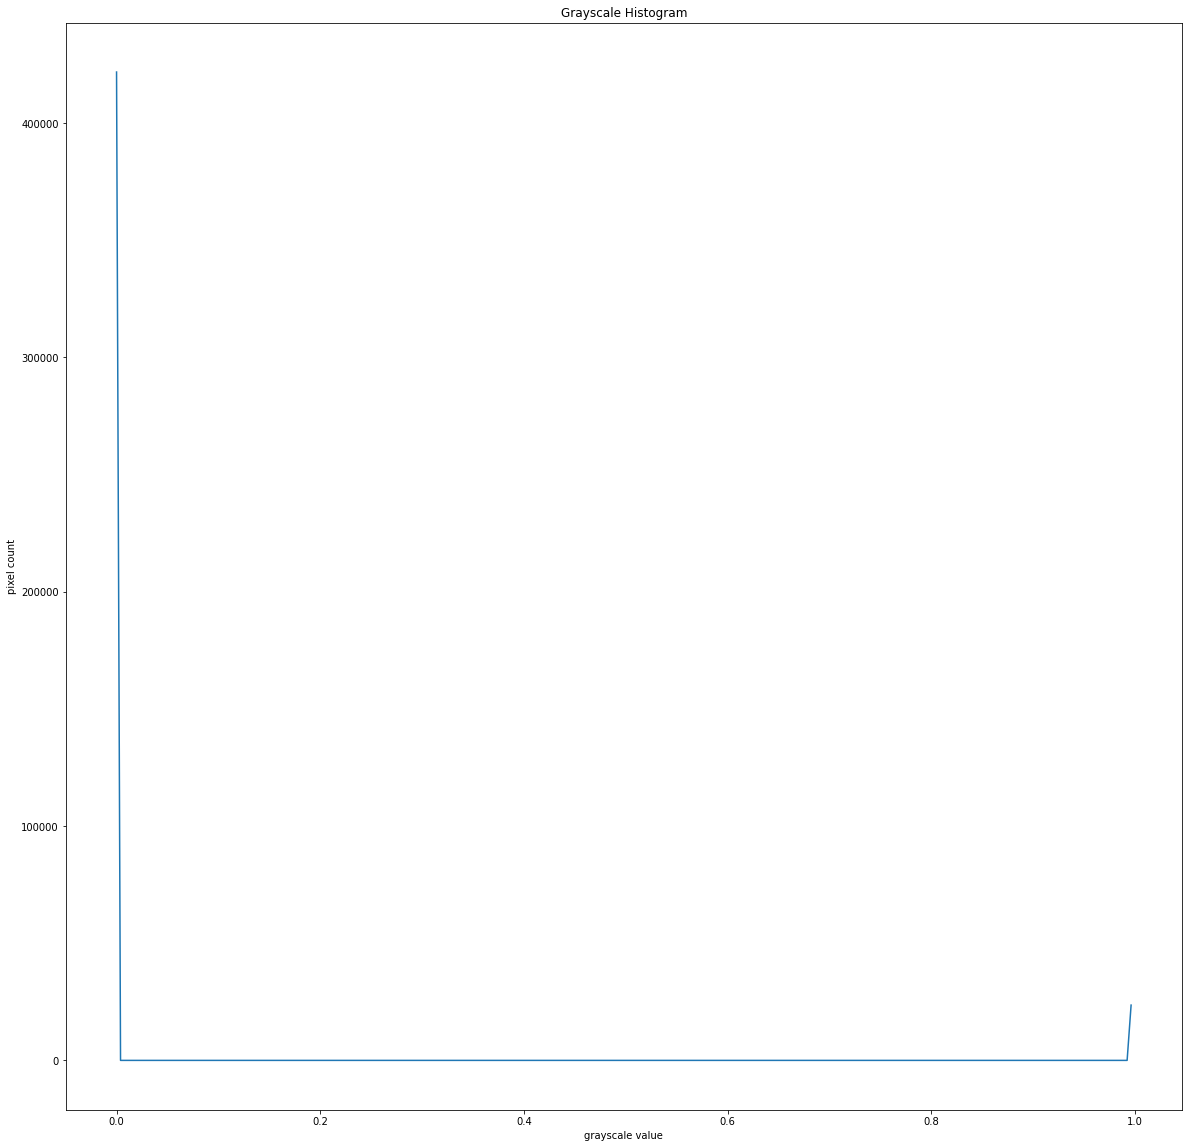

In [73]:
moon = cv2.imread('/content/moon.tif')
moon = cv2.cvtColor(moon, cv2.COLOR_BGR2GRAY)
histogram, bin_edges = np.histogram(moon, bins=256, range=(0, 1))
plt.figure(figsize=(20, 20))
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixel count")

plt.plot(bin_edges[0:-1], histogram)  # <- or here
plt.show()

##Contrast Stretching

original


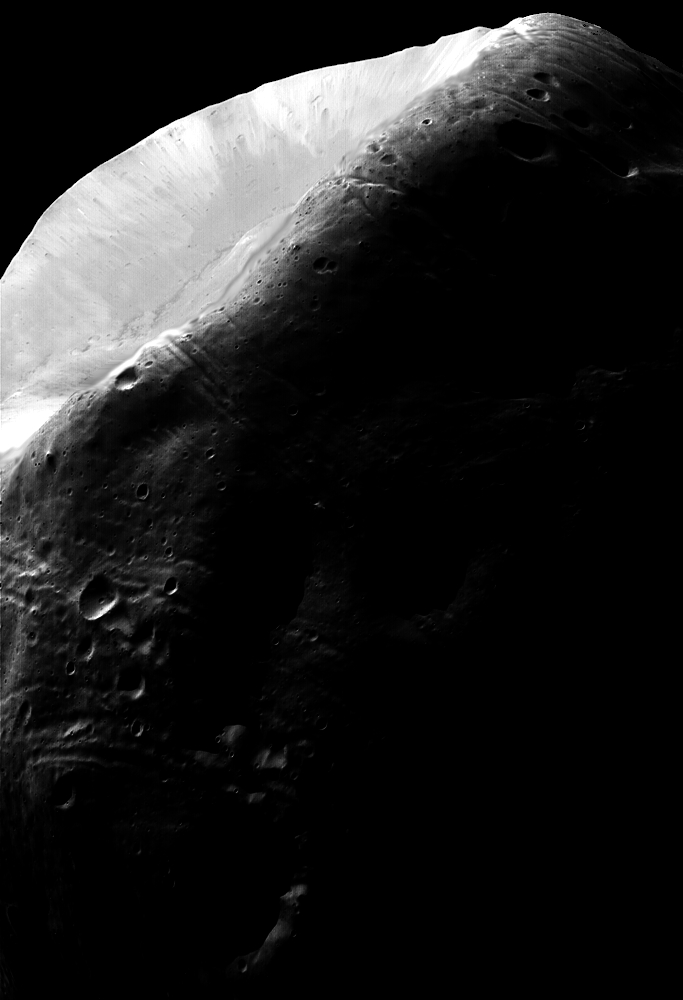

After Contrast Stretching


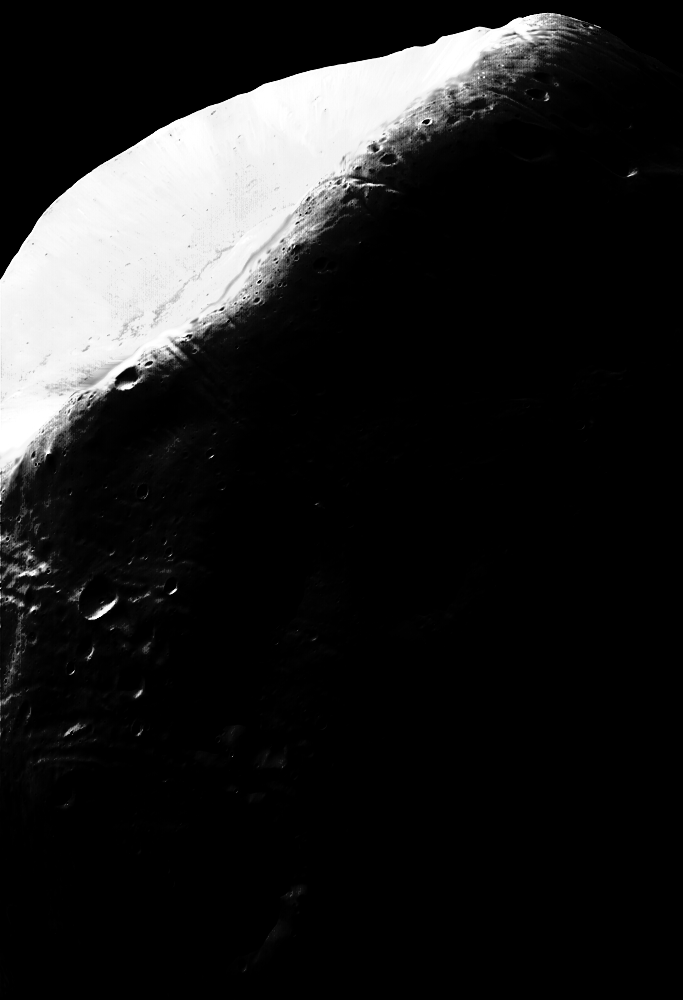

In [57]:
import cv2
import numpy as np

img = cv2.imread('/content/moon.tif')
original = img.copy()
xp = [0, 64, 128, 192, 255]
fp = [0, 16, 128, 240, 255]
x = np.arange(256)
table = np.interp(x, xp, fp).astype('uint8')
img = cv2.LUT(img, table)
print('original')
cv2_imshow(original)
print('After Contrast Stretching')
cv2_imshow(img)

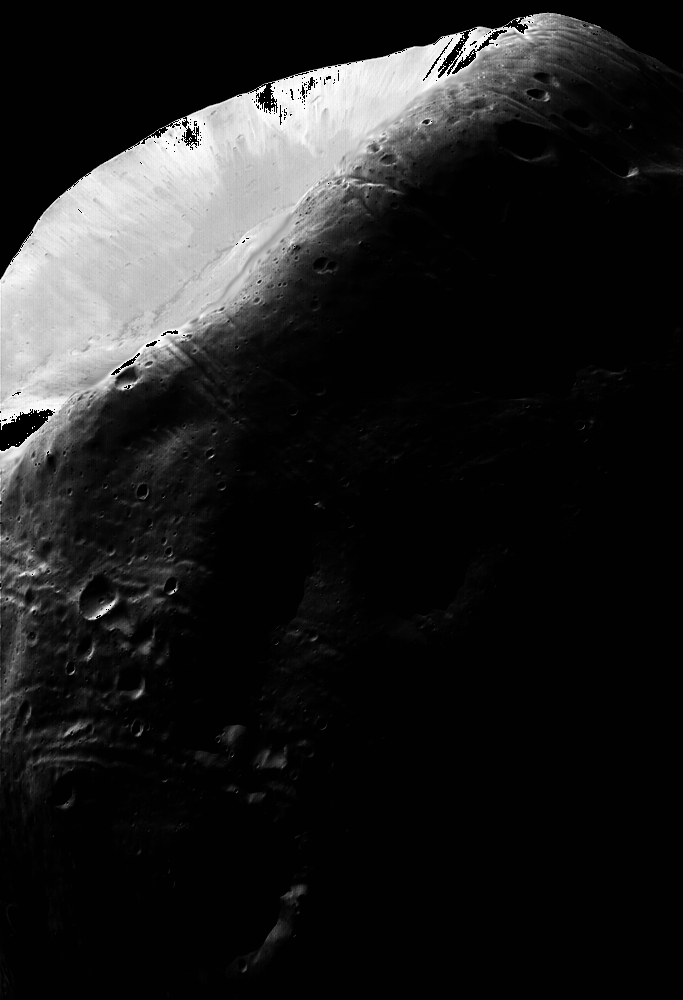

In [89]:
moon = cv2.imread('/content/moon.tif')
moon = cv2.cvtColor(moon, cv2.COLOR_BGR2GRAY)
img = moon.copy()
H, W = moon.shape

for i in range(H):
  for j in range(W):
    moon[i, j] = moon[i, j]+255//255
cv2_imshow(moon)

In [87]:
moon.max()

255